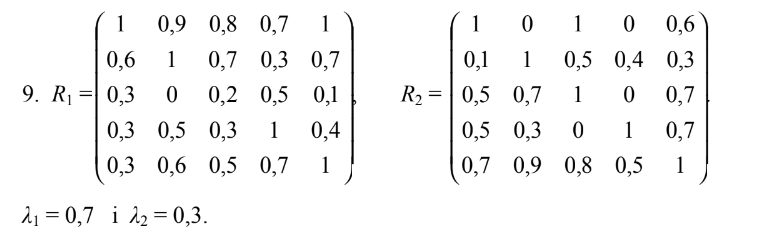

In [1]:
import numpy as np

R1 = np.array([[1.0,0.9,0.8,0.7,1.0],
               [0.6,1.0,0.7,0.3,0.7],
               [0.3,0,0.2,0.5,0.1],
               [0.3,0.5,0.3,1.0,0.4],
               [0.3,0.6,0.5,0.7,1.0]])

R2 = np.array([[1.0,0,1.0,0,0.6],
               [0.1,1.0,0.5,0.4,0.3],
               [0.5,0.7,1.0,0,0.7],
               [0.5,0.3,0,1.0,0.7],
               [0.7,0.9,0.8,0.5,1.0]])

Будуємо відношення $Q_1 = \lambda_1R_1 \cap \lambda_2R_2$,  $\ \lambda_1 = 0.7 \ \ \lambda_2 = 0.3$


In [2]:
l1 = 0.7
l2 = 0.3

l1R1 = l1*R1
l2R2 = l2*R2

Q1 = np.zeros([5,5], dtype = float)

Q2 = np.zeros([5,5], dtype = float) 

for i in range(5):
  for j in range(5):
    Q1[i][j] = min(l1R1[i][j],l2R2[i][j])


print('Q1:\n',Q1)

Q1:
 [[0.3  0.   0.27 0.   0.18]
 [0.03 0.3  0.09 0.12 0.03]
 [0.   0.   0.3  0.   0.07]
 [0.15 0.18 0.   0.3  0.21]
 [0.14 0.   0.07 0.07 0.3 ]]


Будуємо відношення $Q_2 = \lambda_1\R_1 + \lambda_1\R2$

In [3]:
Q2 = l1R1 + l2R2

print('Q2:\n',Q2)

Q2:
 [[1.   0.21 0.83 0.35 0.88]
 [0.45 1.   0.58 0.33 0.52]
 [0.42 0.21 1.   0.63 0.28]
 [0.36 0.88 0.42 1.   0.49]
 [0.44 0.27 0.31 0.19 1.  ]]


Побудуємо відношення строгої переваги $R^s_{Q_1}$ і $R^s_{Q_2}$

In [4]:

Q1_revers = np.zeros([5,5], dtype = float)

Q2_revers = np.zeros([5,5],dtype = float)

for i in range(5):
  for j in range(5):
    Q1_revers[i][j] = Q1[j][i]
    Q2_revers[i][j] = Q2[j][i]

Q1_s = np.zeros([5,5], dtype = float)

Q2_s = np.zeros([5,5], dtype = float)

for i in range(5):
  for j in range(5):
    Q1_s[i][j] = Q1[i][j] - Q1_revers[i][j]
    Q2_s[i][j] = Q2[i][j] - Q2_revers[i][j]
    if Q1_s[i][j] < 0: 
      Q1_s[i][j] = 0
    if Q2_s[i][j] < 0: 
      Q2_s[i][j] = 0

print('Q1_s:\n',Q1_s)
print('Q2_s:\n',Q2_s)

Q1_s:
 [[0.   0.   0.27 0.   0.04]
 [0.03 0.   0.09 0.   0.03]
 [0.   0.   0.   0.   0.  ]
 [0.15 0.06 0.   0.   0.14]
 [0.   0.   0.   0.   0.  ]]
Q2_s:
 [[0.   0.   0.41 0.   0.44]
 [0.24 0.   0.37 0.   0.25]
 [0.   0.   0.   0.21 0.  ]
 [0.01 0.55 0.   0.   0.3 ]
 [0.   0.   0.03 0.   0.  ]]


Знаходимо функції недомінованих альтернитив у множині $(X, R_{Q_1})$, $(X, R_{Q_2})$ за формулою $R^{н.д}_{Q_i}(X) = 1 - \underset{y \in X}{\operatorname{sup}}R^s_{Q_i}(x,y)$

In [5]:
presence_Q1 = np.zeros(5, dtype = float)
presence_Q2 = np.zeros(5, dtype = float)

for i in range(5):
  presence_Q1[i] = round(1 - max(Q1_s[0][i], Q1_s[1][i], Q1_s[2][i], Q1_s[3][i], Q1_s[4][i]),3)
  presence_Q2[i] = round(1 - max(Q2_s[0][i], Q2_s[1][i], Q2_s[2][i], Q2_s[3][i], Q2_s[4][i]),3)

print('presence_Q1:\n',presence_Q1)
print('presence_Q2:\n',presence_Q2)

presence_in_Q1_and_Q2 = min(list(presence_Q1),list(presence_Q2))

print('presence in Q1 and Q2:\n', presence_in_Q1_and_Q2)


presence_Q1:
 [0.85 0.94 0.73 1.   0.86]
presence_Q2:
 [0.76 0.45 0.59 0.79 0.56]
presence in Q1 and Q2:
 [0.76, 0.45, 0.59, 0.79, 0.56]
